<a href="https://colab.research.google.com/github/quangphuc2509/AI-Homework/blob/main/VietnameseFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Kiemtragiuaky/VietnameseFood

/content/drive/MyDrive/Kiemtragiuaky/VietnameseFood


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/Kiemtragiuaky/VietnameseFood/train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')

Found 6493 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train.flow_from_directory('/content/drive/MyDrive/Kiemtragiuaky/VietnameseFood/validation',
                                             target_size=(150,150), batch_size=32, class_mode='categorical')

Found 926 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Banh beo': 0,
 'Banh chung': 1,
 'Banh mi': 2,
 'Bun bo Hue': 3,
 'Bun dau mam tom': 4,
 'Ca kho to': 5,
 'Com tam': 6,
 'Goi cuon': 7,
 'Hu tieu': 8,
 'Mi quang': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Banh beo': 0,
 'Banh chung': 1,
 'Banh mi': 2,
 'Bun bo Hue': 3,
 'Bun dau mam tom': 4,
 'Ca kho to': 5,
 'Com tam': 6,
 'Goi cuon': 7,
 'Hu tieu': 8,
 'Mi quang': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [10]:
# Gán biến lại để vẽ đồ thị, với 50 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), 
# khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng 
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, 
                  validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
203/203 [==============================] - 3050s 15s/step - loss: 2.7886 - accuracy: 0.2215 - val_loss: 1.9255 - val_accuracy: 0.3369
Epoch 2/50
203/203 [==============================] - 203s 999ms/step - loss: 1.8716 - accuracy: 0.3454 - val_loss: 1.8236 - val_accuracy: 0.3629
Epoch 3/50
203/203 [==============================] - 176s 868ms/step - loss: 1.7266 - accuracy: 0.4083 - val_loss: 1.6462 - val_accuracy: 0.4492
Epoch 4/50
203/203 [==============================] - 171s 843ms/step - loss: 1.5829 - accuracy: 0.4642 - val_loss: 1.6060 - val_accuracy: 0.4536
Epoch 5/50
203/203 [==============================] - 169s 834ms/step - loss: 1.4646 - accuracy: 0.5019 - val_loss: 1.5297 - val_accuracy: 0.4860
Epoch 6/50
203/203 [==============================] - 166s 818ms/step - loss: 1.3788 - accuracy: 0.5296 - val_loss: 1.5010 - val_accuracy: 0.4795
Epoch 7/50
203/203 [==============================] - 167s 823ms/step - loss: 1.3138 - accuracy: 0.5615 - val_loss: 1.3784 - 

In [11]:
model.save('/content/drive/MyDrive/Kiemtragiuaky/VietnameseFood/VietnameseFood.h5')

In [12]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.13317543268203735
Train Accuracy 0.9593408107757568


<function matplotlib.pyplot.show(close=None, block=None)>

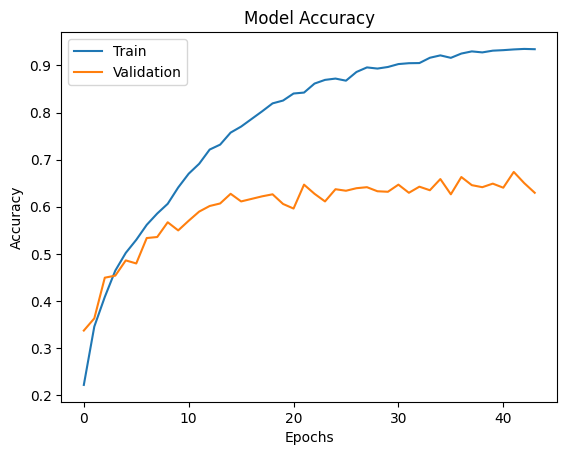

In [13]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [14]:
model_1=load_model('/content/drive/MyDrive/Kiemtragiuaky/VietnameseFood/VietnameseFood.h5')

1/1 [==============================] - 0s 28ms/step
Ca kho to


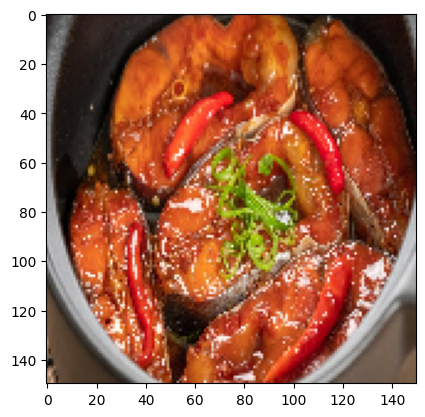

1/1 [==============================] - 0s 36ms/step
Com tam


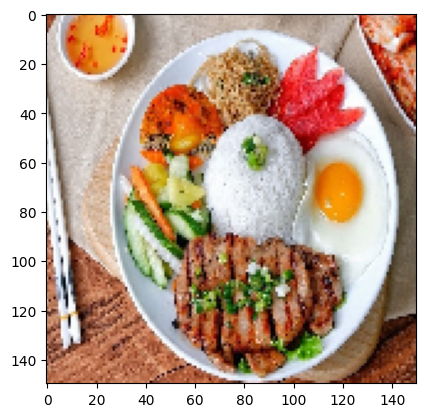

1/1 [==============================] - 0s 34ms/step
Bun bo Hue


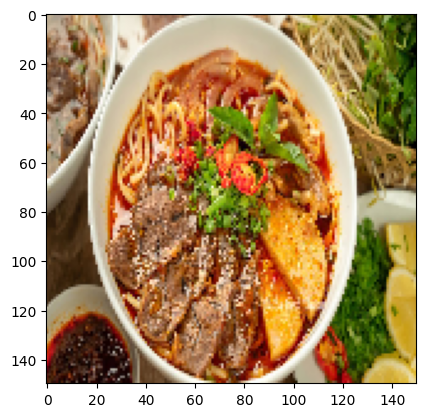

1/1 [==============================] - 0s 31ms/step
Mi quang


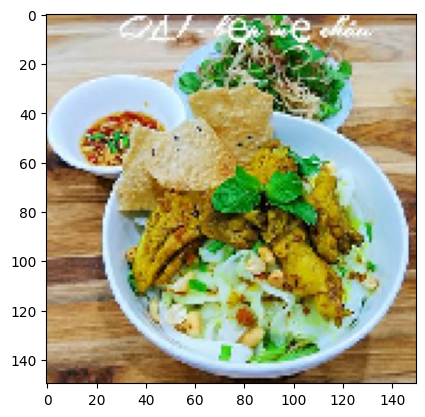

1/1 [==============================] - 0s 38ms/step
Banh chung


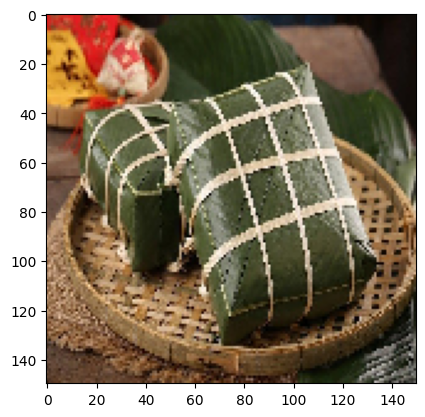

1/1 [==============================] - 0s 23ms/step
Goi cuon


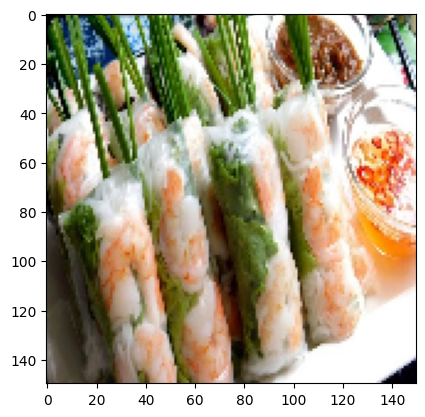

1/1 [==============================] - 0s 21ms/step
Bun dau mam tom


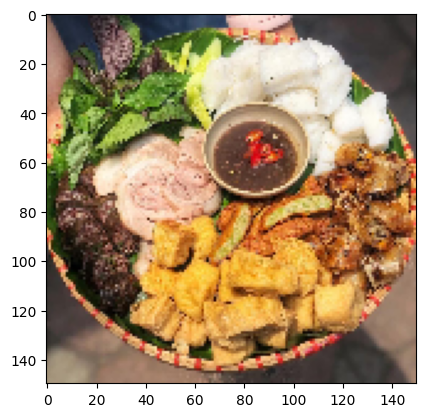

1/1 [==============================] - 0s 27ms/step
Banh mi


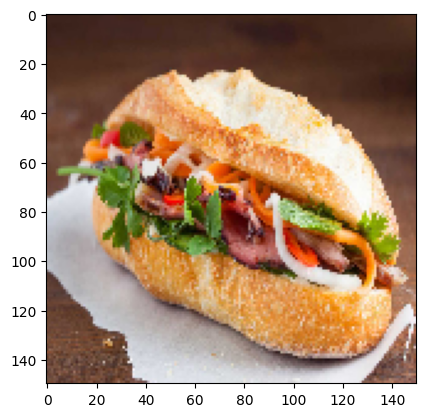

1/1 [==============================] - 0s 20ms/step
Banh beo


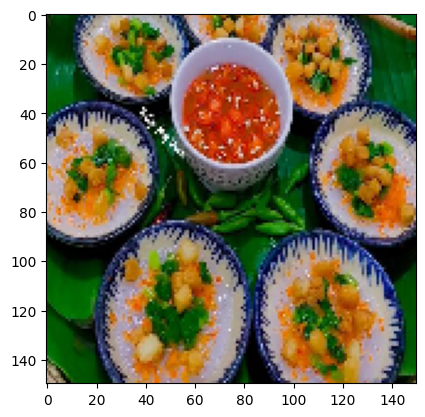

1/1 [==============================] - 0s 22ms/step
Com tam


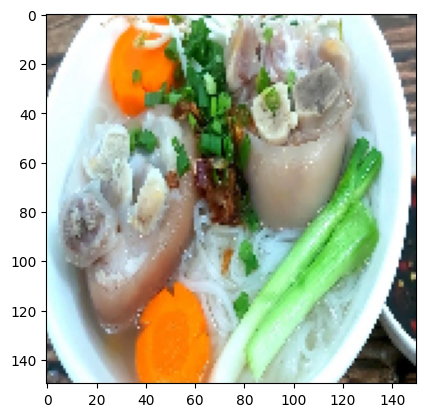

In [18]:
test="/content/drive/MyDrive/Kiemtragiuaky/VietnameseFood/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Banh beo','Banh chung','Banh mi','Bun bo Hue','Bun dau mam tom', 'Ca kho to', 'Com tam', 'Goi cuon', 'Hu tieu', 'Mi quang']
  print(class_name[result])
  plt.show()